# Blue Ridge Parkway Sign Identification

**Author: Eric Englin, Volpe Center**

**Date: 06/16/20**

## Project Description

Volpe Center will be using signage data along the Blue Ridge Parkway to understand the relationship between signage types and the frequency of car crashes. The final findings will be compiled into a report of safety analyses and recommendations for improving safety in the park. 


## Task Description: Sign Identification

Blue Ridge Parkway regional office has given the Volpe Center 236 images of signs in the first 33 miles of the road. Given that the road is 469 miles long, we expect to see a few thousand signs for the length of the road. 

For each sign, the Blue Ridge Parkway team has collected information on the lat/long location of the sign, the physical location of the sign, sign material, and sign type, among other features. Unfortunately, the sign type is fairly vague and more information is needed for this analysis. 

As the beginning of this analysis, we expect to create 2 new features using the pictures in this dataset:
1. Text on the sign
2. Exact sign type




In [126]:
import pandas as pd
map_df = pd.read_csv("signs.csv")

In [127]:
def map_points(df, filename):
    import folium
    import numpy as np

    locations = df[['LAT', 'LON']]
    locationlist = locations.values.tolist()
    df = df.reset_index()

    map1 = folium.Map(location=[np.mean(df.LAT), np.mean(df.LON)], zoom_start=7,
                     tiles = 'Stamen Terrain')
    for point in range(0, len(locationlist)):
        folium.Marker(locationlist[point], popup=('Sign Type: ' + map_df['Sign Type'][point])).add_to(map1)

    filename = filename + ".html"
    map1.save(filename)
    return map1

In [128]:
point_map = map_points(map_df, 'Sign_map')
point_map

In [5]:
from PIL import Image
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\eric.englin\AppData\Local\Tesseract-OCR/tesseract.exe"

In [2]:
from os import listdir
from os.path import isfile, join
mypath = './sign_pics/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [3]:

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

./sign_pics/sign_104.jpg


''

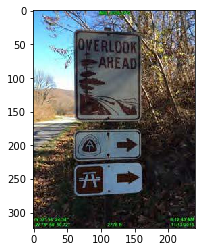

In [10]:
img = cv2.imread('./sign_pics/sign_104.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(filename)
plt.imshow(img)
pytesseract.image_to_string(img, lang='eng')

Found one using threshold:  ./sign_pics/sign_100.jpg
meta eye,
Found one using regular image:  ./sign_pics/sign_101.jpg
NIE regres

Se
Found one using regular image:  ./sign_pics/sign_103.jpg
es
A Waseca

“Tio ae i ee rv 3900
ELEV HERE -— 2800
Found one using gray image:  ./sign_pics/sign_103.jpg
UL ee eer Ley
yea

aa
3 RIDGES MTN:

ae cell kak met oe 2 7, <i: Tele!)

ELEV HERE -— 2800
Found one using inverted image:  ./sign_pics/sign_103.jpg
MuMGI0333.UPG
BNGe or.

Fe
3 RIDGES MTN:

MIGH POINT 3 aa >. ~ SLEW 3900

ELEV HERE -— 2800
Found one using regular image:  ./sign_pics/sign_108.jpg
NO

COMMERCIAL
VEHICLES |f

tt
Found one using gray image:  ./sign_pics/sign_108.jpg
NO

COMMERCIAL
VEHICLES
Found one using inverted image:  ./sign_pics/sign_108.jpg
NO

COMMERCIAL
VEHICLES
Found one using regular image:  ./sign_pics/sign_110.jpg
NORTH >

4
Alu
4

w
Found one using gray image:  ./sign_pics/sign_110.jpg
2

NORTH >

"
‘ . |
a
Found one using inverted image:  ./sign_pics/sign_110.jpg
pe

Found one using threshold:  ./sign_pics/sign_195.jpg
OF Sorts
Found one using regular image:  ./sign_pics/sign_195.jpg
NP SELEY? (AOS) OD)
7 YEP CEP DE raTeL Dial TAEIONG
Found one using gray image:  ./sign_pics/sign_195.jpg
: Rtn ee
ie) al

ti a Soe

 

See

| ow

NES

att |
Found one using inverted image:  ./sign_pics/sign_195.jpg
' estN ST
.

Tis oe

 

—_—

| ow

NES

=
Found one using regular image:  ./sign_pics/sign_198.jpg
COMMERCIAL!
VEHICLES
Found one using gray image:  ./sign_pics/sign_2.jpg
a

f

NY
ret y
: ?
Ne a:

a te]
epee ee

eee
Found one using inverted image:  ./sign_pics/sign_2.jpg
h

f

i y
ree ’
’ ?
Ne a:

a u
es *S

eee
Found one using threshold:  ./sign_pics/sign_20.jpg
ering "

Tog

«
4
a a
.

x. G
of as ‘
” 4
y i .
' $33 ;
ARS
va. Ue Ke
aye FT F2Qe af
Found one using regular image:  ./sign_pics/sign_200.jpg
PARKWAY

 

 

i
}
— ape hy
.
NAL n f raw

a) Th be) Sa > C4: PAS | tab , L PIR FARL
Found one using regular image:  ./sign_pics/sign_203.jpg
a

Ys Montebel

Found one using regular image:  ./sign_pics/sign_83.jpg
SR ad
Found one using gray image:  ./sign_pics/sign_85.jpg
EXHIBIT

or
oar)
Found one using inverted image:  ./sign_pics/sign_85.jpg
>a) Ih

1100 Ale
206
Found one using regular image:  ./sign_pics/sign_88.jpg
DRIPPING Toten .
PARKING AREA “=.

ELEV 2940
om the
Found one using gray image:  ./sign_pics/sign_88.jpg
IMG..0289.JPG

LEY aa ek
Ms A eo
Found one using inverted image:  ./sign_pics/sign_88.jpg
IMG..0289.JPG

N-37° 563,26:09"
W 78° 56° 10:91"
Found one using gray image:  ./sign_pics/sign_92.jpg
Pa aes ror)
Tee rer] reve ory
Found one using inverted image:  ./sign_pics/sign_92.jpg
OF? 96 14 oon 49 am
W Iw se S847 yarn ree ory
Found one using threshold:  ./sign_pics/sign_94.jpg
= Neher:

= toyaitele) SS
_— Mg ECevS3200§

St CO Lae

a.
Found one using gray image:  ./sign_pics/sign_94.jpg
ey
wh, ae f(t
a ies]

See TNS lee
aaa EY Lolo) :
1800 Sane NTN a hg ——

  

 

5 v4 Ses
S

Ap Y

Si 56°01.59
Found one using inverted image: 

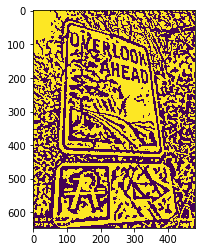

In [122]:
z=0
thresh_count=0
gray_count=0
regular_count=0
invert_count=0
for x in onlyfiles:
    filename = './sign_pics/'+x
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    img = cv2.bilateralFilter(img,9,75,75)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    thresh=cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
    inverted_image = cv2.bitwise_not(img_gray)
    #print(image.show())
    text1 = pytesseract.image_to_string(thresh, lang='eng')
    text2 = pytesseract.image_to_string(img, lang='eng')
    text3 = pytesseract.image_to_string(img_gray, lang='eng')
    text4 = pytesseract.image_to_string(inverted_image, lang='eng')
    #print(text)
    z+=1
    if text1 != "":
        print("Found one using threshold: ", filename)
        print(text1)
        thresh_count+=1
    #    break
    if text2 != "":
        print("Found one using regular image: ", filename)
        print(text2)
        regular_count+=1
    if text3 != "":
        print("Found one using gray image: ", filename)
        print(text3)
        gray_count+=1
    if text4 != "":
        print("Found one using inverted image: ", filename)
        print(text4)
        invert_count+=1
    #if z>5:
    #    break
        
plt.imshow(thresh)

In [123]:
regular_count, thresh_count, gray_count

(43, 37, 49)

''

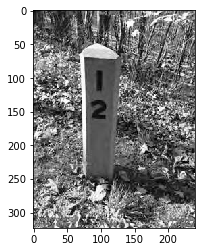

In [104]:
img = cv2.imread(filename,0)
plt.imshow(img, cmap='Greys_r')
pytesseract.image_to_string(img, lang='eng')

''

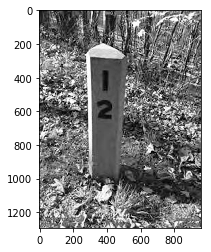

In [106]:
img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(img, cmap='Greys_r')
pytesseract.image_to_string(img, lang='eng')

''

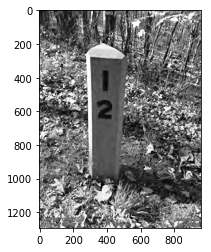

In [107]:
img = cv2.bilateralFilter(img,9,75,75)
plt.imshow(img, cmap='Greys_r')
pytesseract.image_to_string(img, lang='eng')

''

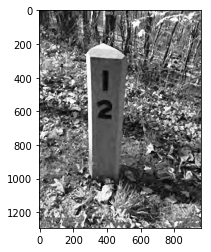

In [108]:
img_blur = cv2.medianBlur(img,5).astype('uint8')
plt.imshow(img_blur, cmap='Greys_r')
pytesseract.image_to_string(img, lang='eng')

''

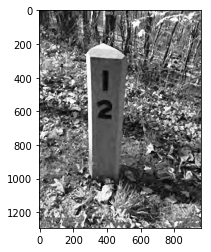

In [110]:
plt.imshow(img_blur, cmap='Greys_r')
pytesseract.image_to_string(img, lang='eng')

''

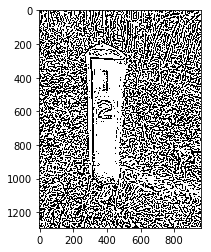

In [111]:
thresh=cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
plt.imshow(thresh, cmap='Greys_r')
pytesseract.image_to_string(thresh, lang='eng')

### Exploration on Colors

I know there will be a lot of stop signs in this dataset, so it would be good to have some kind of a process to pick out likely stop sign pictures. 

In [130]:
filename = './sign_pics/sign_9.jpg'

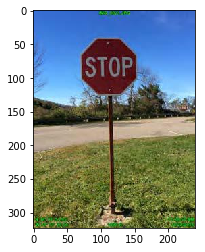

In [148]:
stopsign = cv2.imread(filename)
stopsign = cv2.cvtColor(stopsign, cv2.COLOR_BGR2RGB)
plt.imshow(stopsign)

In [149]:
#stop sign color boundaries
boundaries = [
	([150, 0, 0], [250,90, 100])
]


./sign_pics/sign_10.jpg :  0.0
./sign_pics/sign_100.jpg :  0.0005159958720330237
./sign_pics/sign_101.jpg :  3.869969040247678e-05
./sign_pics/sign_102.jpg :  0.0
./sign_pics/sign_103.jpg :  1.4333218667583992e-05
./sign_pics/sign_104.jpg :  0.0
./sign_pics/sign_105.jpg :  0.0
./sign_pics/sign_106.jpg :  0.059004127966976266
./sign_pics/sign_107.jpg :  0.0
./sign_pics/sign_108.jpg :  3.869969040247678e-05
./sign_pics/sign_109.jpg :  4.299965600275198e-05
./sign_pics/sign_11.jpg :  0.0
./sign_pics/sign_110.jpg :  0.003212074303405573
./sign_pics/sign_111.jpg :  0.0002708978328173375
./sign_pics/sign_112.jpg :  3.869969040247678e-05
./sign_pics/sign_113.jpg :  0.00012899896800825592
./sign_pics/sign_114.jpg :  2.5799793601651186e-05
./sign_pics/sign_115.jpg :  0.10708204334365325
./sign_pics/sign_116.jpg :  0.013106295149638804
./sign_pics/sign_117.jpg :  0.07245872033023736
./sign_pics/sign_118.jpg :  3.869969040247678e-05
./sign_pics/sign_119.jpg :  0.14713765623208347
./sign_pics/sign

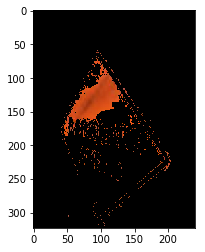

In [150]:
Z=0
for x in onlyfiles:
    filename = './sign_pics/'+x
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # loop over the boundaries
    for (lower, upper) in boundaries:
        # create NumPy arrays from the boundaries
        lower = np.array(lower, dtype = "uint8")
        upper = np.array(upper, dtype = "uint8")
        # find the colors within the specified boundaries and apply
        # the mask
        mask = cv2.inRange(img, lower, upper)
        output = cv2.bitwise_and(img, img, mask = mask)
        plt.imshow(output)
    count=0
    total = 0
    for x in output:
        for y in x:
            if sum(y)>0:
                count +=1
            total+=1
    
    #if count/total>0.01:
    print(filename, ": ", count/total)
    Z+=1
    if Z>50:
        break

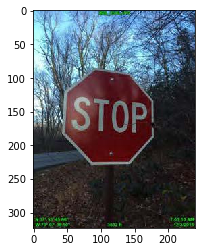

In [151]:
filename = './sign_pics/sign_188.jpg'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [152]:
from colorthief import ColorThief
color_thief = ColorThief(filename)
# get the dominant color
dominant_color = color_thief.get_color(quality=1)
dominant_color

(46, 39, 41)

In [153]:
# our red color is : (150-255,<100,<100)
palette = color_thief.get_palette(color_count=20)
palette

[(131, 184, 215),
 (91, 131, 169),
 (189, 229, 235),
 (121, 100, 102),
 (77, 110, 114),
 (83, 25, 29),
 (50, 74, 104),
 (26, 24, 24),
 (54, 65, 66),
 (58, 38, 37),
 (48, 167, 52),
 (31, 44, 67),
 (37, 45, 39),
 (30, 33, 45),
 (44, 33, 31),
 (164, 84, 92),
 (36, 88, 160),
 (60, 164, 164),
 (4, 20, 12)]